&nbsp;

# 3. Feature Engineering
Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. Feature engineering is one of the most important steps when it comes to a machine learning project because algorithms can only interpret data in a certain way (numerical). For example, categorical data must be binary encoded for it to be considered during the fitting process. Furthermore, there could be features that disrupt the correlation between the label and other features, so removing them is just as important. 

In [1]:
# Standard libraries. 
import pandas as pd
import numpy as np 
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Importing our functions. 
import functions
import visuals

# Importing chosen models. 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing transformers. 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder

# Converts plotly output into static images, so it can be viewed inside github repository. 
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
root = os.getcwd() # Setting root directory as cwd. 
df = pd.read_csv(r"{}\train_new_features.csv".format(root)) # Importing the train set.
df.set_index("Name", inplace=True)
df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,Martial Status,Survived
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,S,young adult,Not Married,0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,female,38.0,1,0,PC 17599,71.2833,C,middle aged,Married,1


&nbsp;

### Section A: Data Preparation
In this section we'll focus on standardizing and normalizing our numerical dataset to hopefully boost performance from our chosen algorithms. However, before we implement these transforms, we must first set our benchmarks. 

**A.1: Benchmarks** <br>
The first step is to set up our benchmarks, so we have a point of reference against which things may be compared. This is a very important step whenever conducting empirical testing.

In [3]:
# The model_evaluation() class sets up the pipeline to transform the data then returns a cross validated score. 
LR = functions.model_evaluation()
LR.preprocessing(df)
LR.add_pipe_component("clf", LogisticRegression(max_iter=1000))
LR.cross_validation(df)

In [4]:
GBC = functions.model_evaluation()
GBC.preprocessing(df)
GBC.add_pipe_component("clf", GradientBoostingClassifier())
GBC.cross_validation(df)

In [5]:
XGB = functions.model_evaluation()
XGB.preprocessing(df)
XGB.add_pipe_component("clf", XGBClassifier())
XGB.cross_validation(df)

In [6]:
# Setting up benchmarks. 
benchmarkLR = {"Base_LR" : LR.cv_result}
benchmarkGBC = {"Base_GBC" : GBC.cv_result}
benchmarkXGB = {"Base_XGB" : XGB.cv_result}

| Model | Model Type | Benchmark |  
|---------|---------|---------|
| **Logistic Regression** | Base Model | 81.64% |
| **Gradient Boosting Classifier** | Base Model | 81.45% |
| **XGB Classifier** | Base Model | 81.42% |

**A.2: Standardization** <br>
Standardization converts the mean to 0 and a standard deviation of 1. Usually this transform is conducted on Gaussian distributions. Standardizing your dataset can potentially lead you to an uplift in performance. 

In [7]:
# The model_evaluation() class sets up the pipeline to transform the data then returns a cross validated score. 
LR_s = functions.model_evaluation()
LR_s.preprocessing(df)
LR_s.add_pipe_component("s", StandardScaler())
LR_s.add_pipe_component("clf", LogisticRegression(max_iter=1000))
LR_s.cross_validation(df)

# Our hypothesis is that a standardized dataset will boost model performance.  
functions.hypothesis_testing(LR_s.cv_result, benchmarkLR, "LR_Standardized")

We reject the null hypothesis with the new benchmark for LR_Standardized: 82.5760%


In [8]:
# The model_evaluation() class sets up the pipeline to transform the data then returns a cross validated score. 
GBC_s = functions.model_evaluation()
GBC_s.preprocessing(df)
GBC_s.add_pipe_component("s", StandardScaler())
GBC_s.add_pipe_component("clf", GradientBoostingClassifier())
GBC_s.cross_validation(df)

functions.hypothesis_testing(GBC_s.cv_result, benchmarkGBC, "GBC_standardized")

We accept the null hypothesis.


In [9]:
# The model_evaluation() class sets up the pipeline to transform the data then returns a cross validated score. 
XGB_s = functions.model_evaluation()
XGB_s.preprocessing(df)
XGB_s.add_pipe_component("s", StandardScaler())
XGB_s.add_pipe_component("clf", XGBClassifier())
XGB_s.cross_validation(df)

functions.hypothesis_testing(XGB_s.cv_result, benchmarkXGB, "XGB_standardized")

We accept the null hypothesis.


| Model | Model Type | Benchmark |  
|---------|---------|---------|
| **Logistic Regression** | Standardized | 82.58% |
| **Gradient Boosting Classifier** | Standardized | 81.69% |
| **XGB Classifier** | Base Model | 81.42% |

**A.3: Normalization** <br>
Normalization is the process of rescaling the dataset to the range of 0 to 1.

In [10]:
# The model_evaluation() class sets up the pipeline to transform the data then returns a cross validated score. 
LR_n = functions.model_evaluation()
LR_n.preprocessing(df)
LR_n.add_pipe_component("n", Normalizer())
LR_n.add_pipe_component("clf", LogisticRegression(max_iter=1000))
LR_n.cross_validation(df)

# Our hypothesis is that a normalized dataset will boost model performance.  
functions.hypothesis_testing(LR_n.cv_result, benchmarkLR, "LR_normalized")

We accept the null hypothesis.


In [11]:
# The model_evaluation() class sets up the pipeline to transform the data then returns a cross validated score. 
GBC_n = functions.model_evaluation()
GBC_n.preprocessing(df)
GBC_n.add_pipe_component("n", Normalizer())
GBC_n.add_pipe_component("clf", GradientBoostingClassifier())
GBC_n.cross_validation(df)

functions.hypothesis_testing(GBC_n.cv_result, benchmarkGBC, "GBC_normalized")

We accept the null hypothesis.


In [12]:
# The model_evaluation() class sets up the pipeline to transform the data then returns a cross validated score. 
XGB_n = functions.model_evaluation()
XGB_n.preprocessing(df)
XGB_n.add_pipe_component("n", Normalizer())
XGB_n.add_pipe_component("clf", XGBClassifier())
XGB_n.cross_validation(df)

functions.hypothesis_testing(XGB_n.cv_result, benchmarkXGB, "XGB_ntandardized")

We accept the null hypothesis.


| Model | Model Type | Benchmark |  
|---------|---------|---------|
| **Logistic Regression** | Standardized | 82.58% |
| **Gradient Boosting Classifier** | Standardized | 81.69% |
| **XGB Classifier** | Base Model | 81.42% |

&nbsp;

### Section B: Recursive Feature Elimination
In this section we'll focus be focusing on Feature Elimination using scikit-learn's Recrusive Feature Elimination algorithm. RFE is a feature elimination technique which aims to find the most important features when it comes to predicting our labels. It works through our entire feature space, recursively considering smaller and smaller sets of features. Through each iteration it assigns weights to features (e.g., the feature_importance_ attribute in any classification estimator) and uses this metric to gauge how imporant each feature is at predicting the target variable. At the end of the process, only the most important features are kept. 

**B.1: Transforming our Data** <br>
However, before we can conduct RFE, we must first transform our feature space so that it's suitable to be fed into the algorithm (i.e., impute missing values, encode categorical features).

In [13]:
# Separating our numerical & categorical columns for ColumnTransformer. 
numerical = list(df.select_dtypes(['float64']).columns)
print(f'Numerical columns are: {numerical}')

categorical = list(df.select_dtypes(exclude=['float64']).columns)
categorical.remove("Survived") # Remove label from data. 
print(f'Categorical columns are: {categorical}')

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Define numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categorical),
    ('num', num_pipe, numerical)
])

# Fit a pipeline with transformers and an estimator to the training data
pipe = Pipeline([
    ('preprocessor', preprocessor)
])

Numerical columns are: ['Age', 'Fare']
Categorical columns are: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Age Group', 'Martial Status']


In [14]:
# Extract SimpleImputer transfrom from the num_pipe.  
num_data = pipe.named_steps['preprocessor'].transformers[1][1].fit_transform(df[numerical])
# Creating dataframe. 
num_df = pd.DataFrame(data=num_data, columns=list(df[numerical].columns))

# Imputing the categorical data. 
imputed_data = pipe.named_steps['preprocessor'].transformers[0][1][0].fit_transform(df[categorical])
imputed_cat =  pd.DataFrame(imputed_data, columns=categorical)

# Encoding the categorical data. 
encoded_data = pipe.named_steps['preprocessor'].transformers[0][1][1].fit_transform(imputed_cat)
cat_df = pd.DataFrame(encoded_data, columns=pipe.named_steps['preprocessor'].transformers[0][1][1].
                      get_feature_names_out(categorical))

# Merging both numerical and categorical features back into a single dataframe. 
merged = pd.concat([cat_df, num_df], axis=1) 
df.reset_index(inplace=True)
df = df.drop(columns=["Name"])
processed = pd.concat([merged, df.iloc[:,-1]], axis=1) # Attaching our dependant variable to our processed dataset. 
processed.head(2)

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Embarked_S,Age Group_child,Age Group_middle aged,Age Group_senior,Age Group_young adult,Martial Status_Married,Martial Status_Not Married,Age,Fare,Survived
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,22.0,7.2500,0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,38.0,71.2833,1


**B.2: Logistic Regression**<br>
Now let's implement RFECV onto our base Logistic Regression Model.

In [15]:
LR_rfe = functions.model_evaluation()
# arguments(data, model) 
LR_rfe.RFE_cross_validate(processed, LogisticRegression(max_iter=1000))
print("Optimal number of features: %d" % LR_rfe.rfe_result.n_features_)

# Store results into a dictionary. 
dictLR = LR_rfe.rfe_result.cv_results_

Optimal number of features: 590


**B.3: Gradient Boosting Classifier**<br>
Now let's implement RFECV onto our base Gradient Boosting Model.

In [16]:
GBC_rfe = functions.model_evaluation()
# arguments(data, model) 
GBC_rfe.RFE_cross_validate(processed, GradientBoostingClassifier())
print("Optimal number of features: %d" % GBC_rfe.rfe_result.n_features_)

# Store results into a dictionary. 
dictGBC = GBC_rfe.rfe_result.cv_results_

Optimal number of features: 6


**B.4: XGB Classifier**<br>
Now let's implement RFECV onto our base XGB Classifier Model.

In [17]:
XGB_rfe = functions.model_evaluation()
# arguments(data, model) 
XGB_rfe.RFE_cross_validate(processed, XGBClassifier())
print("Optimal number of features: %d" % XGB_rfe.rfe_result.n_features_)

# Store results into a dictionary. 
dictXGB = XGB_rfe.rfe_result.cv_results_

Optimal number of features: 23


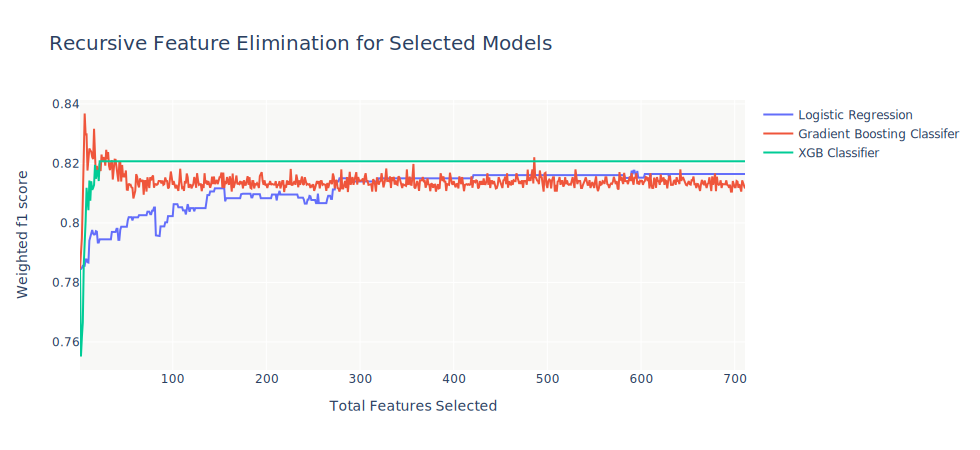

In [18]:
# Setting up axes values. 
x_axis = list(range(1, len(dictLR['mean_test_score']) + 1)) # Maximum no. of features is 711.
y_LR = dictLR['mean_test_score']
y_GBC = dictGBC['mean_test_score']
y_XGB = dictXGB['mean_test_score']

visuals.plot_rfe(xaxis=x_axis, yLR=y_LR, yGBC=y_GBC, yXGB=y_XGB)

* In conclusion we saw minor improvements across all models with the RFE technique.
* The small boost in performance does not justify the long training hours it takes to eliminate redundnat features for only a 1-2% boost in performance.
* Moving forward, we will not be including RFE into our pipeline, for efficiency purposes.

&nbsp;

&nbsp;
**Author:** Aaron Chew&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Date Published:** 11/08/2022 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Email:** aaronsamuelchew@gmail.com &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **GitHub:** https://github.com/aaron-chew  